# Module 02_03: Pairwise Distance using Intel Extensions for Scikit-learn*

From our slides - Below is a graphical depiction of the pairwise distance algorithm.
![Assets/PairwiseSimple.PNG](Assets/PairwiseSimple.PNG)

## Here is an Application of the pairwise distance algorithm

![Assets/PairwiseStocks.jpg](Assets/PairwiseStocks.jpg)

## Learning Objectives:

- Describe and apply the correct surgical patching method to patch pairwise_distance
-  recall that "the **'euclidean'** metric is not optimized by **Intel Extensions for Scikit learn**, but the metrics "**'cosine'** and **'correlation'**  are
- Describe the application of pairwise_distance to the problem of finding all time series  charts  similar to a chosen pattern

**References:**
for Background on Geometric Brownian Motion more generally see:

P. Glasserman, Monte Carlo methods in financial engineering. Vol. 53 (2013), Springer Science & Business Media.


## Background:

Geometrics Brownian Motion using arrays's of precomputed random numbers is used to synthesize a portfolio of 500 stocks which are saved in data/portfolio.npy. We created minute data for one years worth of trades. The data are random but partialy correlated with randomly generated eigenvectors to simulate stock behavoir.  

The goal for the exercise is to find one of several interesting trading patterns and plot the stocks that best match that pattern using **pairwise_distance** powered by oneAPI.



In [1]:
## Read the precomputed, synthesized stock portfolio of 500 stocks (minute trades for a year)
import numpy as np
with open('data/portfolio500.npy', 'rb') as f:
    P = np.load(f)

## Plot the whole portfolio at once to get a feel for the spreadof the data

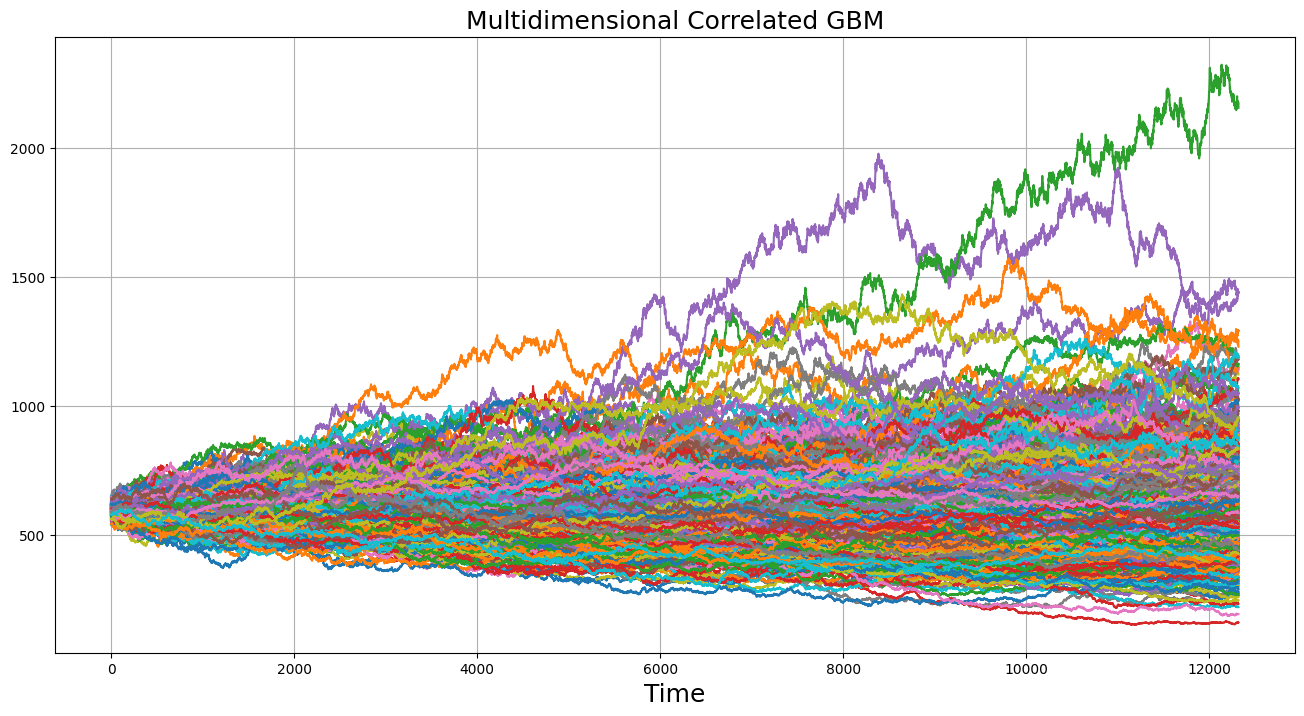

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (16,8))
plt.title('Multidimensional Correlated GBM', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

plt.plot(P)
plt.grid()
plt.show()

## Plot just a handful to see if they look "stock like"

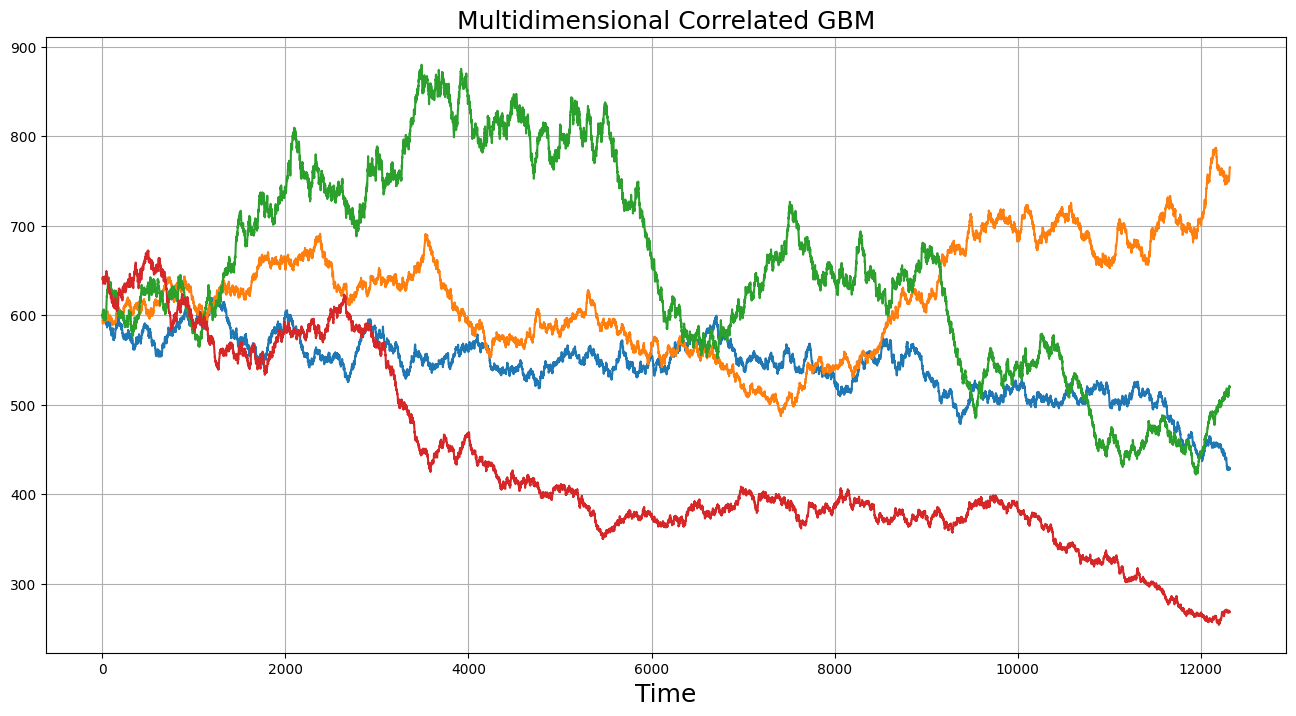

In [3]:
plt.figure(figsize = (16,8))
plt.title('Multidimensional Correlated GBM', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

plt.plot(P[:,:4])
plt.grid()

# Retreive previous compelling stock shapes

Retrieve shapes found during a previous run. These compelling shapes are ones that reflect a decline in the overall price over time (and if we use -1 times this shape plus adjusting a differenr offset for plotting purposes, we get an overall rise in price over time). Other intersting shapes are cyclical over various time periods within the year.

Now search for these shape patterns in the 500 generated stocks, to find similarly shaped times series

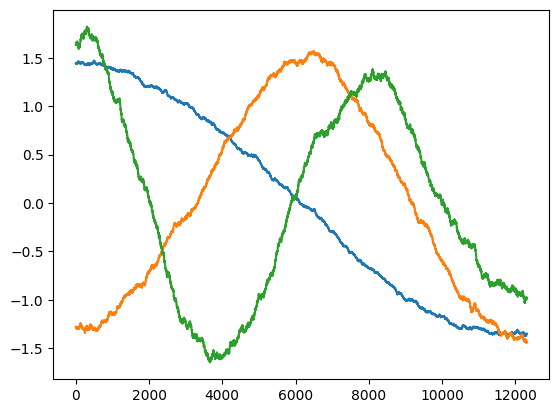

In [4]:
import numpy as np
import time
seed = 2022
with open('data/shapes{}.npy'.format(seed), 'rb') as f:
    shapes = np.load(f)
for i in range(3):
    plt.plot(shapes.T[i])

In [5]:
shapes.shape, P.shape

((12320, 10), (12320, 500))

# Use Pairwise Distance find similar shaped stocks

Read shapes2022.pny (or shapesxxxx.pny)

This file contains 10 interesting shapes from a previous run

Find the four closest matching simulated stocks to the one of several interesting shapes

# Exercise: Apply a surgical patch below

Use surgical patch where you specify the pairwise_distance function explicitly


In [6]:
shapes[:,0].reshape(-1,1).T.shape, P.T.shape

((1, 12320), (500, 12320))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


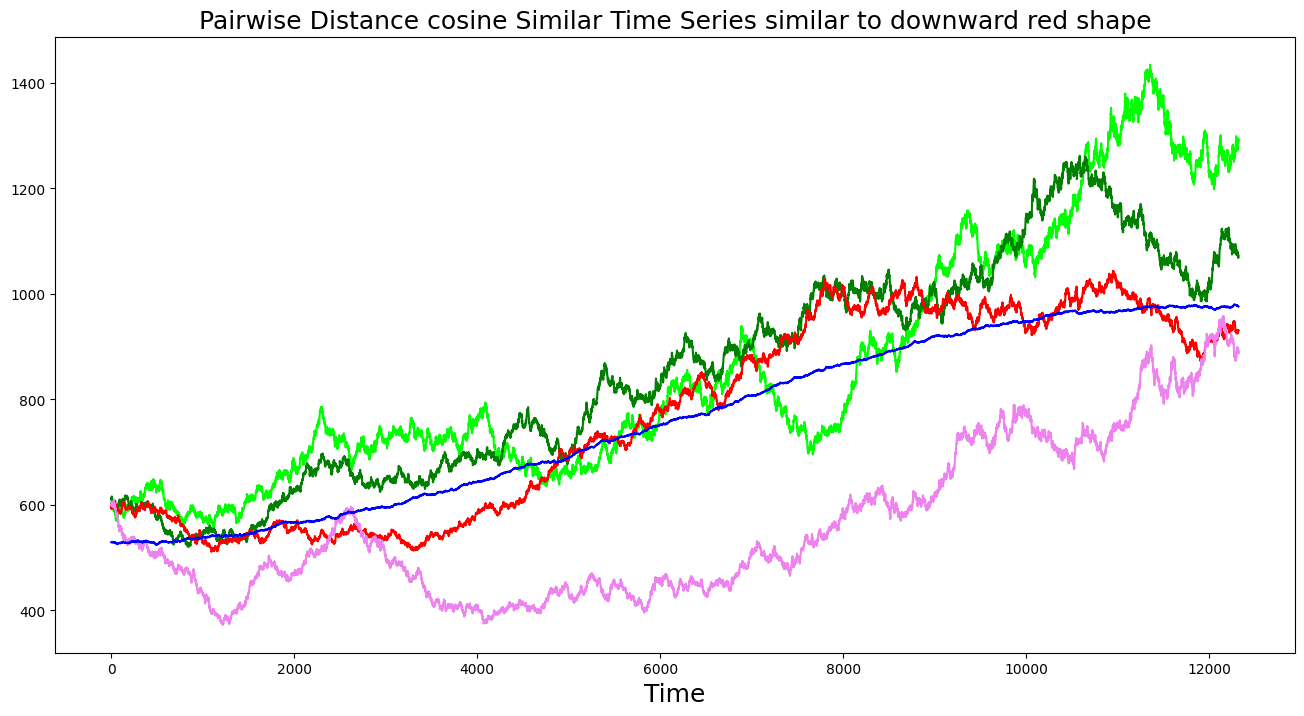

In [7]:
# dominant trend - find top 3 stocks which follow the red rend

findN = 4

#########################################################################
# insert patch code here - use surgical method for pairwise_distances
from sklearnex import patch_sklearn
patch_sklearn()
#########################################################################

from sklearn.metrics.pairwise import pairwise_distances

# for stocks, I am treating the time as the components of the vector
# so I transpose the X & Y so that time[s] are the columns
sim = pairwise_distances(P.T, Y=-1*shapes[:,0].reshape(-1,1).T, metric='cosine') 
#sim = pairwise_distances(P.T, Y=shapes[:,1].reshape(-1,1).T, metric="correlation")
# use np.argpartition to find the 4 closest similar to sorting the array and choosing the first 4 or last 4
idxs = np.argpartition(sim.flatten(), findN)[findN:]

plt.figure(figsize = (16,8))
plt.title('Pairwise Distance cosine Similar Time Series similar to downward red shape', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

colors = ['lime','g','r','violet']
for i in range(len(colors)):
    plt.plot(P[:,idxs[i]], c=colors[i])
scaleNormalized = -160
scaleOffset = 600
plt.plot(scaleNormalized*shapes[:,0] + scaleOffset - scaleNormalized, c = 'b')


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


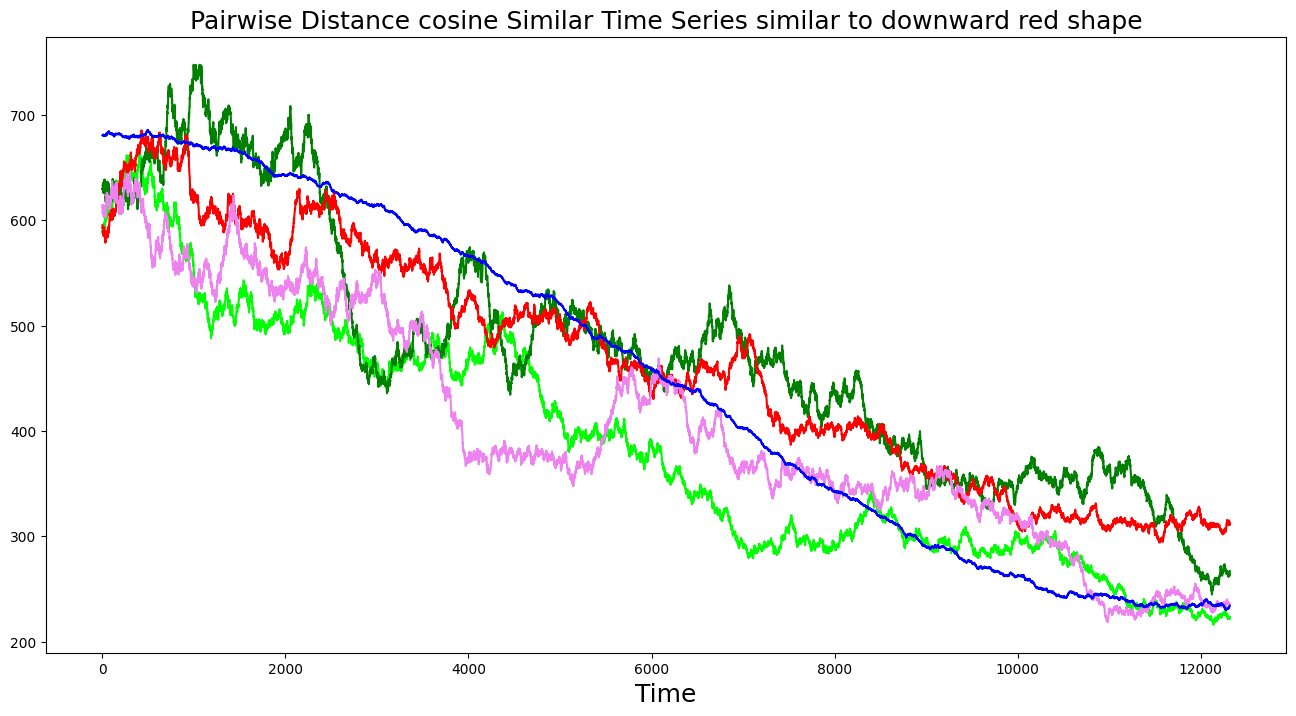

In [8]:
# dominant trend - find top 3 stocks which follow the red rend

findN = 4

#########################################################################
# insert patch code here - use surgical method for pairwise_distances
from sklearnex import patch_sklearn
patch_sklearn()
#########################################################################

from sklearn.metrics.pairwise import pairwise_distances

# for stocks, I am treating the time as the components of the vector
# so I transpose the X & Y so that time[s] are the columns
sim = pairwise_distances(P.T, Y=shapes[:,0].reshape(-1,1).T, metric='cosine') 
#sim = pairwise_distances(P.T, Y=shapes[:,1].reshape(-1,1).T, metric="correlation")
# use np.argpartition to find the 4 closest similar to sorting the array and choosing the first 4 or last 4
idxs = np.argpartition(sim.flatten(), findN)[findN:]

plt.figure(figsize = (16,8))
plt.title('Pairwise Distance cosine Similar Time Series similar to downward red shape', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

colors = ['lime','g','r','violet']
for i in range(len(colors)):
    plt.plot(P[:,idxs[i]], c=colors[i])
plt.plot(160*shapes[:,0] + 450, c = 'b')


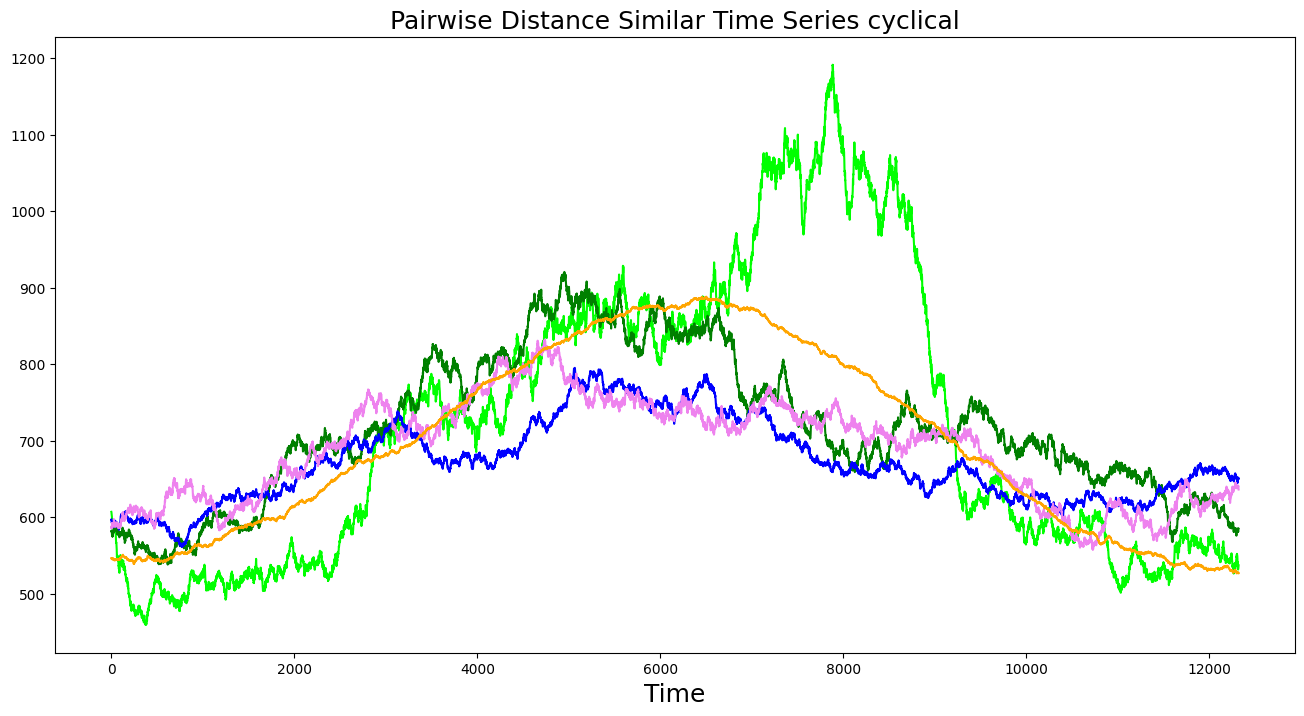

In [9]:
# inverse dominant trend - find top 3 stocks - trending down which follow the red trend
# Experimenting with using Correlation instead of cosine - Cosine mathces much better
sim = pairwise_distances(P.T, Y=shapes[:,1].reshape(-1,1).T, metric='correlation') 
idxs = np.argpartition(sim.flatten(), findN)[findN:]

plt.figure(figsize = (16,8))
plt.title('Pairwise Distance Similar Time Series cyclical', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

colors = ['lime','g','b','violet']
for i in range(len(colors)):
    plt.plot(P[:,idxs[i]], c=colors[i])
plt.plot(120*shapes[:,1] + 700, c = 'orange')

# Notices & Disclaimers 

Intel technologies may require enabled hardware, software or service activation.
No product or component can be absolutely secure.

Your costs and results may vary.

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. 
*Other names and brands may be claimed as the property of others.

In [10]:
print("All Done")

All Done
